<a href="https://colab.research.google.com/github/diegoaxsel99/machine-learning-emg/blob/master/notebooks/matrix1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importar los datos procesados que se encuentran en git ya procesados por lib.py

la matrix de caracteristicas corresponde a la extraccion de caracteristicas estadisticas de los nivles 2 y 4 de la wavelet db7


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

url = 'https://raw.githubusercontent.com/diegoaxsel99/machine-learning-emg/master/features%20csv/matrix1.csv'

In [ ]:
df = pd.read_csv(url)

#analisis exploratorio

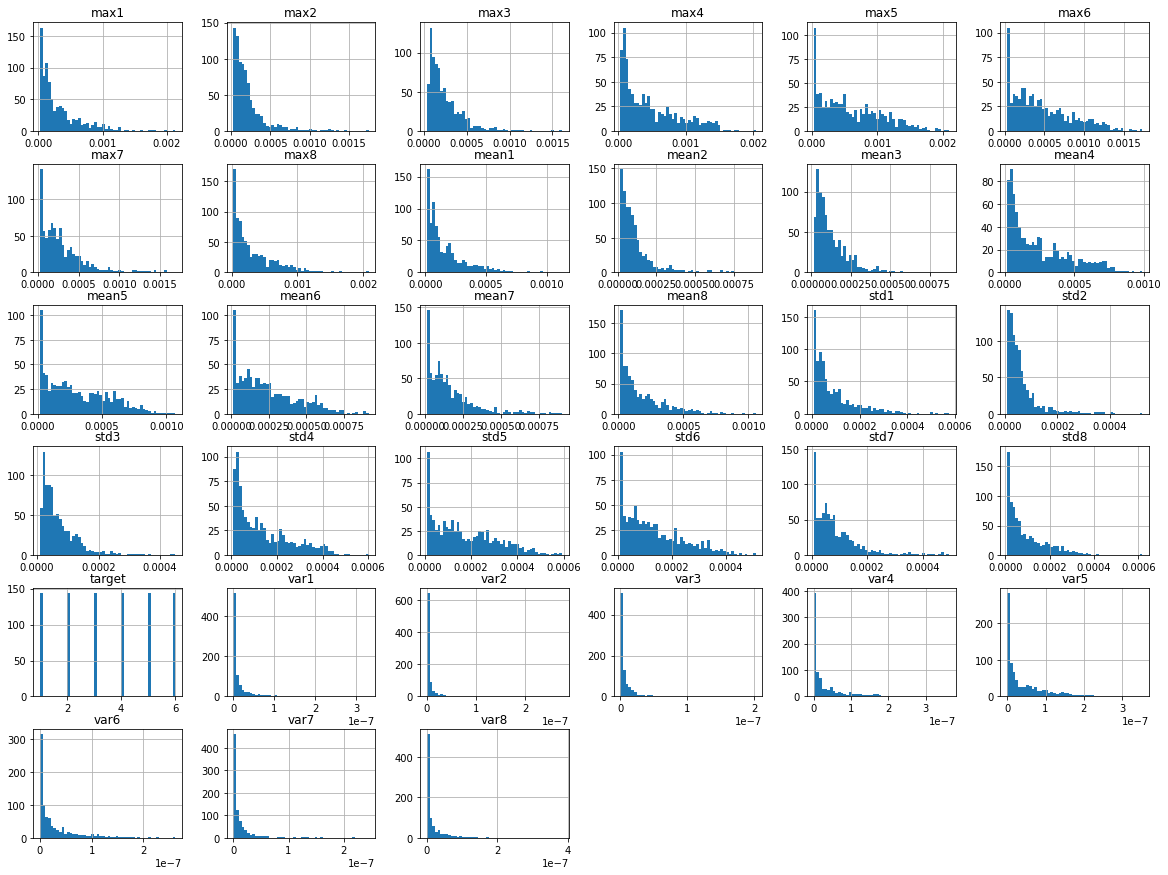

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (20,15))
plt.show()


matrix de correlaccion


In [ ]:
def plot_corr(df,size = 20):
    
    cor_mat = df.corr()
    cols = df.columns
    sns.set(font_scale=1)
    
    plt.figure()
    
    heat_map = sns.heatmap(cor_mat,
                           cbar=True,
                           annot=True,
                           square=True,
                           fmt='.2f',
                           annot_kws={'size': 5},
                           yticklabels=cols,
                           xticklabels=cols)
    
    plt.title('Correlation Matrix - Heat Map')
    plt.show() 



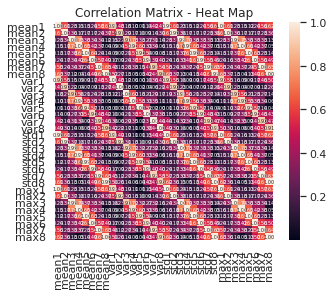

In [ ]:
plot_corr(df.drop(['target'], axis = 1))

# probar algoritmos supervisados 

**k neighbors**

In [ ]:
def score(df, clf):
    
    [f,c] = df.shape
    
    X = df.iloc[:,:c - 1]
    y = df.iloc[:,c - 1]
     
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
    
    knn_score= cross_validate(clf,X_train,y_train,cv=10)
    knn_score2= cross_validate(clf,X_test,y_test,cv=10)
    
    precision = []
    std = []
    precision.append(np.mean(knn_score['test_score']))
    std.append(np.std(knn_score['test_score']))
    precision.append(np.mean(knn_score2['test_score']))
    std.append(np.std(knn_score2['test_score']))
    
    data_ = {"precision":precision,"desviacion":std}
    index = ["train","test"]
    
    return pd.DataFrame(data_, columns = list(data_.keys()), index = index)

In [ ]:
 clf = KNeighborsClassifier(n_neighbors = 5,
                               weights = "distance",
                               metric = "manhattan")
score(df,clf)

,precision,desviacion
train,0.913678,0.032395
test,0.828355,0.086488


**support vector machine**

In [ ]:
clf = SVC(decision_function_shape = "ovo")
score(df,clf)

,precision,desviacion
train,0.890385,0.050781
test,0.824242,0.054059


**Decision tree**

In [ ]:
clf = DecisionTreeClassifier(random_state = 0)
score(df,clf)

,precision,desviacion
train,0.822404,0.027874
test,0.791342,0.076491


**Random Forest**

In [ ]:
clf = RandomForestClassifier()
score(df, clf)

,precision,desviacion
train,0.902764,0.037359
test,0.824675,0.042953
